In [1]:
!pip install imbalanced-learn
!pip install scikit-learn

In [6]:
!pip install --upgrade imbalanced-learn scikit-learn pandas numpy seaborn matplotlib optuna

In [8]:
!python -m ipykernel install --user --name python3.13 --display-name "Python 3.13"

Installed kernelspec python3.13 in C:\Users\dell\AppData\Roaming\jupyter\kernels\python3.13


In [11]:
!pip install imblearn

In [13]:
!pip install imbalanced-learn scikit-learn pandas numpy

In [15]:
!pip install imbalanced-learn==0.7.0

   ---------------------------------------- 167.1/167.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [16]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

from sklearn.model_selection import train_test_split  # Split dataset into train and test
from imblearn.over_sampling import SMOTE  # Handle class imbalance

from sklearn.preprocessing import OneHotEncoder, PowerTransformer  # Encoding & scaling
from sklearn.compose import ColumnTransformer  # Apply transformations to specific columns
from imblearn.pipeline import Pipeline  # Create an imbalanced pipeline

from sklearn.ensemble import RandomForestClassifier  # Random Forest model for classification
import optuna  # Hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Model evaluation metrics
from sklearn.utils import resample  # Resampling methods for balancing data

In [17]:
data= pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\equipment_anomaly_data.csv')

In [18]:
data.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [19]:
data.shape

(7672, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [21]:
data.isna().sum()

temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64

In [22]:
# Convert 'faulty' col -> int
data['faulty']= data['faulty'].astype(int)

In [23]:
X= data.drop('faulty', axis=1)
y= data['faulty']

In [24]:
numeric_features= X.select_dtypes(exclude=['object']).columns
string_features= X.select_dtypes(include=['object']).columns

<AxesSubplot:>

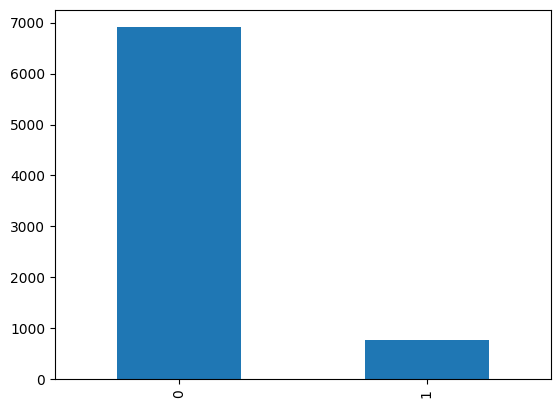

In [25]:
data['faulty'].value_counts().plot(kind='bar')

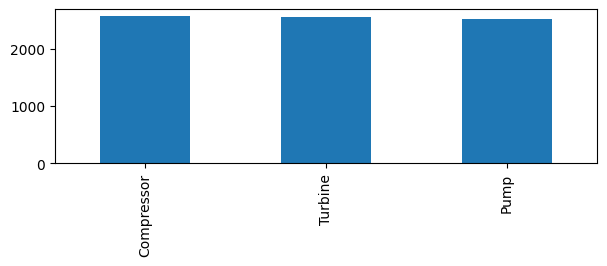

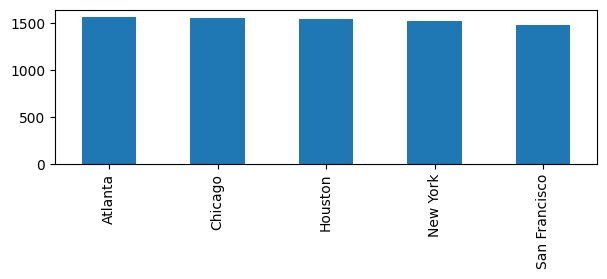

In [26]:
# String features

for col in string_features:
    
    plt.figure(figsize=(7, 2))
    data[col].value_counts().plot(kind='bar')

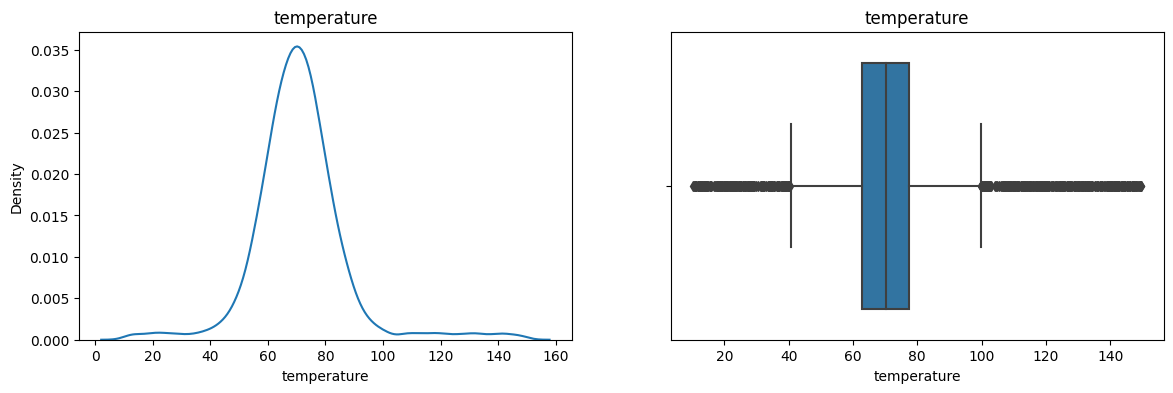

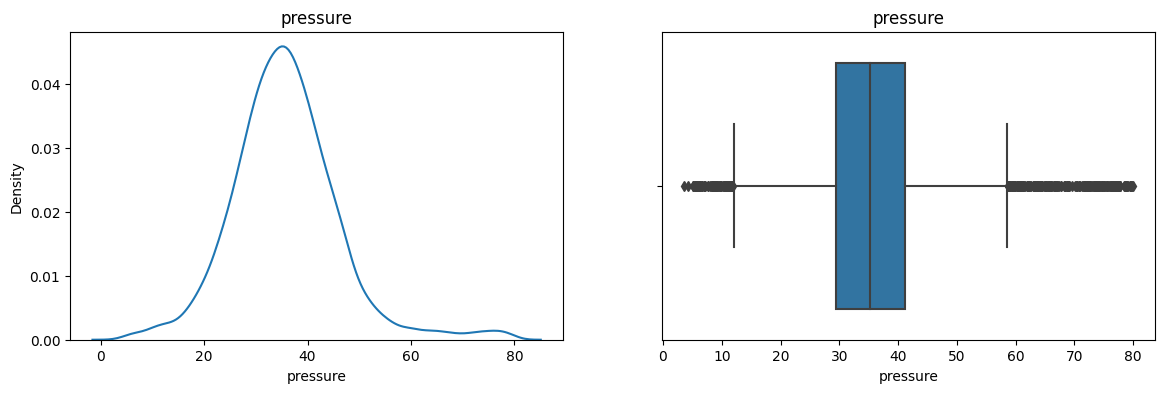

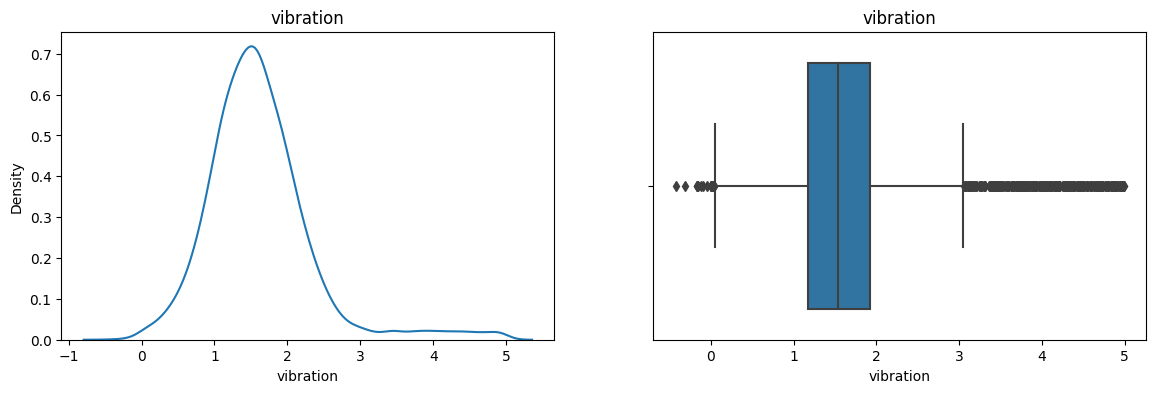

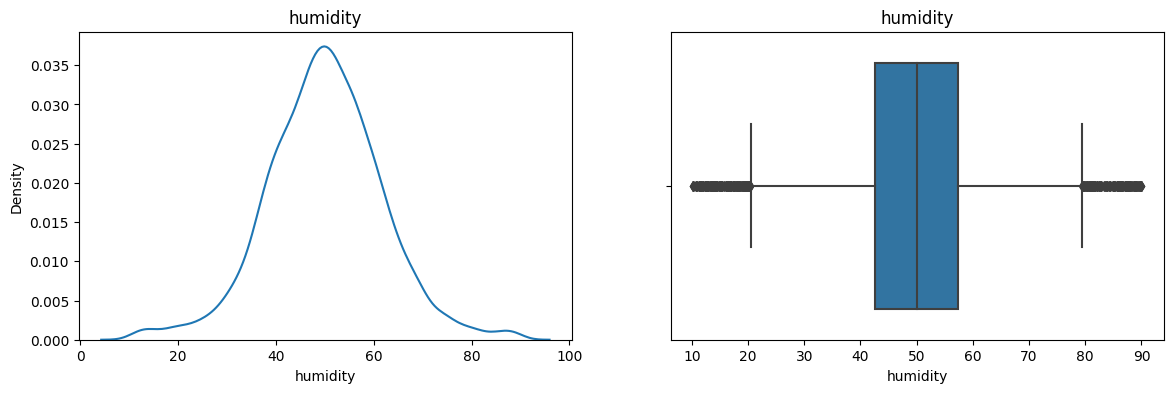

In [27]:
# Numeric features
for col in numeric_features:

    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    sns.kdeplot(data=data, x=col)
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(data=data, x=col)
    plt.title(col)

In [28]:
normal_cols= ['temperature', 'pressure', 'vibration', 'humidity']

for col in normal_cols:
    print(f"\nBefore Outlier Detection: {col}\n{data[col].describe()}")

    upper_limit= data[col].mean() + (3 * data[col].std())
    lower_limit= data[col].mean() - (3 * data[col].std())

    print(f"\nUpper limit: {upper_limit}\nLower limit: {lower_limit}\n")

    data[col]= np.where(
        data[col] > upper_limit,
        upper_limit,
    
        np.where(
            data[col] < lower_limit, 
            lower_limit,
            data[col]
        )
    )

    print(f"After Outlier Detection: {col}\n{data[col].describe()}")


Before Outlier Detection: temperature
count    7672.000000
mean       70.922478
std        16.200059
min        10.269385
25%        62.777057
50%        70.156900
75%        77.568387
max       149.690420
Name: temperature, dtype: float64

Upper limit: 119.5226548734943
Lower limit: 22.322301439418965

After Outlier Detection: temperature
count    7672.000000
mean       70.658058
std        14.814171
min        22.322301
25%        62.777057
50%        70.156900
75%        77.568387
max       119.522655
Name: temperature, dtype: float64

Before Outlier Detection: pressure
count    7672.000000
mean       35.738048
std        10.381593
min         3.620798
25%        29.485682
50%        35.227544
75%        41.159913
max        79.887734
Name: pressure, dtype: float64

Upper limit: 66.88282749608402
Lower limit: 4.593269079814469

After Outlier Detection: pressure
count    7672.000000
mean       35.625373
std         9.985532
min         4.593269
25%        29.485682
50%        35.227

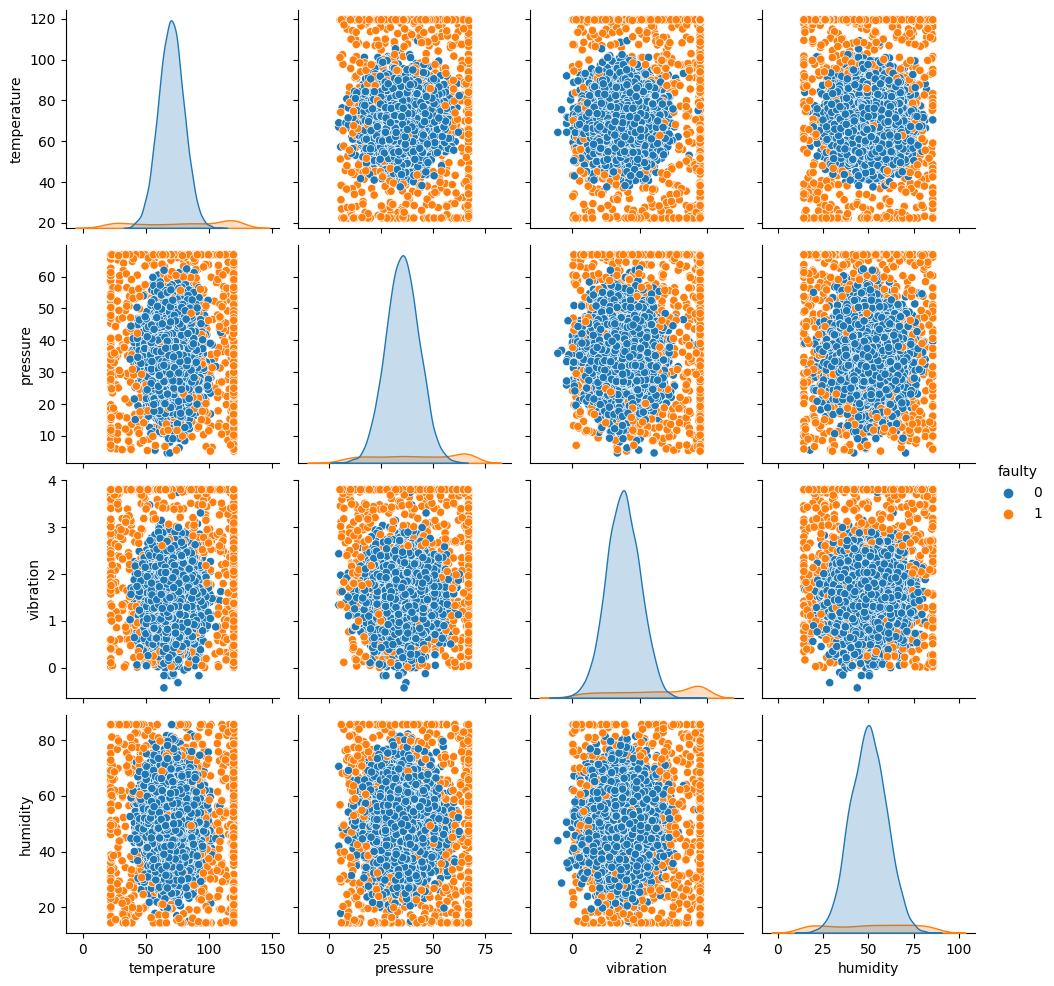

In [29]:
sns.pairplot(data, hue= 'faulty')

<AxesSubplot:>

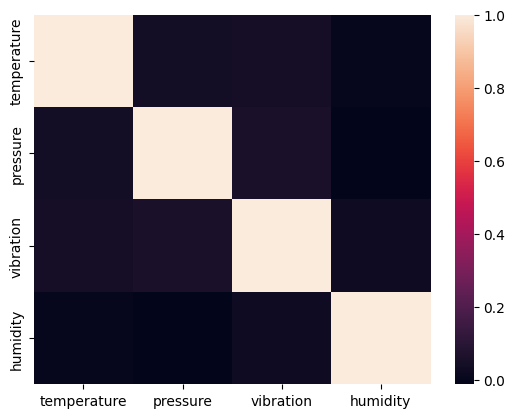

In [30]:
corr_matrix= data[numeric_features].corr()
sns.heatmap(corr_matrix)

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [34]:
# Pipeline to apply OneHotEncoder for string transformation
string_transformer = Pipeline([
    ('One_Hot_Encoder', OneHotEncoder(drop='first', sparse=False))  
])

In [35]:
# Pipeline to apply PowerTransformer for numerical data transformation
numeric_transformer = Pipeline([
    ('Power_Transformer', PowerTransformer())
])

In [36]:
preprocessor = ColumnTransformer([
    ('string_transformer', string_transformer, string_features),  # Apply string transformation
    ('numeric_transformer', numeric_transformer, numeric_features)  # Apply numeric transformation
], remainder='passthrough') 

In [37]:
# Pipeline to preprocess data, handle imbalance, and apply a RandomForest model
model = RandomForestClassifier(random_state=42) 

 # SMOTE for class imbalance handling
smote = SMOTE(random_state=42) 

pipe = Pipeline([
      ('preprocessor', preprocessor),  # Preprocessing step
      ('smote', smote),  # Handle class imbalance with SMOTE
      ('model', model)  # Apply the RandomForest model
])

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('string_transformer',
                                                  Pipeline(steps=[('One_Hot_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['equipment', 'location'], dtype='object')),
                                                 ('numeric_transformer',
                                                  Pipeline(steps=[('Power_Transformer',
                                                                   PowerTransformer())]),
                                                  Index(['temperature', 'pressure', 'vibration', 'humidity'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('mod

In [40]:
y_preds= pipe.predict(X_test)

In [41]:
accuracy_score(y_test, y_preds)

0.9745928338762215

In [42]:
def random_forest_objective(trial):

    # Define the hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 10, 300)
    max_depth = trial.suggest_int("max_depth", 5, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_samples = trial.suggest_float("max_samples", 0.5, 1.0)
    
    criterion = trial.suggest_categorical('criterion', ["gini", "entropy", "log_loss"])

    
    
    # Initialize the Random Forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion= criterion,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_samples= max_samples, 
        random_state=42
    )

    pipe= Pipeline([
          ('preprocessor', preprocessor),  
          ('smote', smote),  
          ('model', model)  
    ])

    pipe.fit(X_train, y_train)

    y_preds= pipe.predict(X_test)

    acc_sc= accuracy_score(y_test, y_preds)

    return acc_sc

In [52]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

def random_forest_objective(trial):
    # Define the parameter space for hyperparameter tuning
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_samples': trial.suggest_float('max_samples', 0.5, 1.0),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])  # Correct criterion values
    }
    
    # Create a RandomForestClassifier with parameters from the trial
    rf = RandomForestClassifier(**param_grid)
    
    # Define which columns are numeric and which are categorical
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns
    
    # Define a preprocessor to handle categorical and numeric features differently
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values for numeric columns
                ('scaler', StandardScaler())  # Standardize numeric columns
            ]), numeric_features),
            
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
                ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
            ]), categorical_features)
        ])
    
    # Create a pipeline that first applies the preprocessor and then applies the RandomForest classifier
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('classifier', rf)
    ])
    
    # Split the data (ensure X and y are defined)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Return the model's accuracy on the test set
    accuracy = pipeline.score(X_test, y_test)
    return accuracy

# Define and run the Optuna study
random_forest_study = optuna.create_study(direction='maximize')
random_forest_study.optimize(random_forest_objective, n_trials=50)

[I 2024-12-31 22:41:04,905] A new study created in memory with name: no-name-6ea3ef3c-5751-4847-8097-a0f06836bfaa
[I 2024-12-31 22:41:06,823] Trial 0 finished with value: 0.977845351867941 and parameters: {'n_estimators': 160, 'max_depth': 10, 'max_features': None, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_samples': 0.5048410311170957, 'criterion': 'gini'}. Best is trial 0 with value: 0.977845351867941.
[I 2024-12-31 22:41:08,592] Trial 1 finished with value: 0.9813205907906168 and parameters: {'n_estimators': 203, 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_samples': 0.9313186143977104, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9813205907906168.
[I 2024-12-31 22:41:13,307] Trial 2 finished with value: 0.9826238053866203 and parameters: {'n_estimators': 161, 'max_depth': 14, 'max_features': None, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_samples': 0.8491447298968322, 'criterion': 'entropy'}. Best is tri

[I 2024-12-31 22:42:03,832] Trial 27 finished with value: 0.9791485664639444 and parameters: {'n_estimators': 172, 'max_depth': 15, 'max_features': None, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_samples': 0.8851656955864338, 'criterion': 'gini'}. Best is trial 23 with value: 0.9856646394439618.
[I 2024-12-31 22:42:05,501] Trial 28 finished with value: 0.9808861859252823 and parameters: {'n_estimators': 72, 'max_depth': 14, 'max_features': None, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_samples': 0.9592970561664027, 'criterion': 'gini'}. Best is trial 23 with value: 0.9856646394439618.
[I 2024-12-31 22:42:06,088] Trial 29 finished with value: 0.9813205907906168 and parameters: {'n_estimators': 143, 'max_depth': 9, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_samples': 0.5262831985923778, 'criterion': 'gini'}. Best is trial 23 with value: 0.9856646394439618.
[I 2024-12-31 22:42:07,900] Trial 30 finished with value: 0.9830582102519548 

In [53]:
random_forest_study.best_value, random_forest_study.best_params

(0.9865334491746307,
 {'n_estimators': 164,
  'max_depth': 12,
  'max_features': None,
  'min_samples_split': 8,
  'min_samples_leaf': 4,
  'max_samples': 0.9244317116919825,
  'criterion': 'entropy'})

In [55]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Import ImbPipeline from imbalanced-learn
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define best RandomForest model with optimized hyperparameters from Optuna
best_model = RandomForestClassifier(
    n_estimators=random_forest_study.best_params['n_estimators'],
    criterion=random_forest_study.best_params['criterion'],
    max_depth=random_forest_study.best_params['max_depth'],
    max_features=random_forest_study.best_params['max_features'],
    min_samples_split=random_forest_study.best_params['min_samples_split'],
    min_samples_leaf=random_forest_study.best_params['min_samples_leaf'],
    max_samples=random_forest_study.best_params['max_samples'], 
    random_state=42
)

# Create the SMOTE object for balancing the dataset
smote = SMOTE(random_state=42)

# Create the pipeline with preprocessor, SMOTE, and the best model
best_pipe = ImbPipeline([  # Use ImbPipeline from imbalanced-learn
    ('preprocessor', preprocessor),  # Assuming preprocessor is already defined
    ('smote', smote),  # SMOTE for oversampling
    ('model', best_model)  # The RandomForest model
])

# Fit pipeline to training data
best_pipe.fit(X_train, y_train)

# Make predictions on the test data
y_preds = best_pipe.predict(X_test)

In [56]:
accuracy_score(y_test, y_preds)

0.9726384364820847

In [57]:
precision_score(y_test, y_preds)

0.844311377245509

In [58]:
recall_score(y_test, y_preds)

0.8980891719745223

In [59]:
f1_score(y_test, y_preds)

0.8703703703703705

In [60]:
# Get feature names after preprocessing
preprocessor_feature_names = best_pipe.named_steps['preprocessor'].get_feature_names_out()

# Extract feature names
feature_names = np.array([s.split('__')[1] for s in preprocessor_feature_names])

# Get feature importances from the model
importances = best_pipe.named_steps['model'].feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [61]:
feature_importances_df

,Feature,Importance
0,equipment_Pump,0.005504
1,equipment_Turbine,0.009417
2,location_Chicago,0.002412
3,location_Houston,0.004903
4,location_New York,0.004259
5,location_San Francisco,0.010920
6,temperature,0.370183
7,pressure,0.151865
8,vibration,0.364267
9,humidity,0.076269


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'equipment_Pump'),
  Text(1, 0, 'equipment_Turbine'),
  Text(2, 0, 'location_Chicago'),
  Text(3, 0, 'location_Houston'),
  Text(4, 0, 'location_New York'),
  Text(5, 0, 'location_San Francisco'),
  Text(6, 0, 'temperature'),
  Text(7, 0, 'pressure'),
  Text(8, 0, 'vibration'),
  Text(9, 0, 'humidity')])

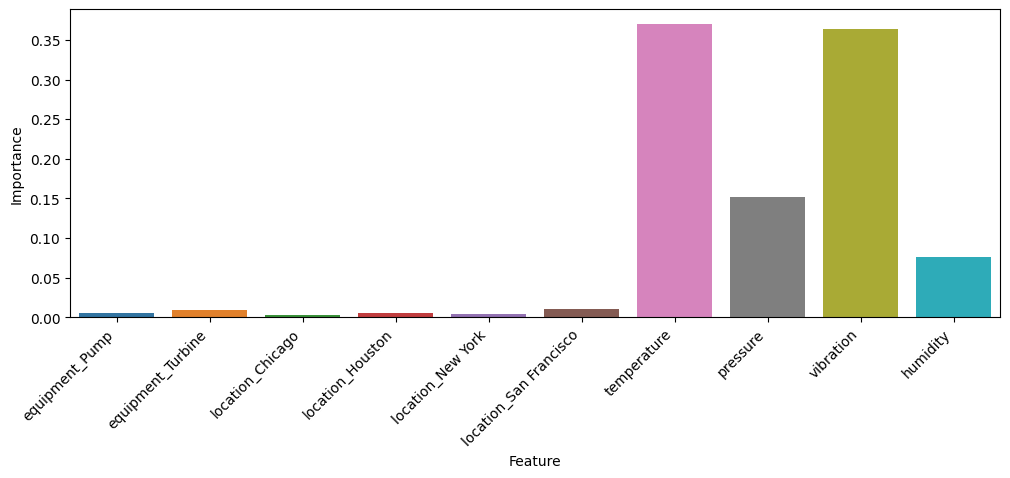

In [62]:
plt.figure(figsize=(12, 4))
sns.barplot(feature_importances_df, x='Feature', y='Importance')
plt.xticks(rotation=45, ha='right')